# Визуальный анализ данных

# matplotlib

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
np.random.seed(18182)
xs = np.arange(10)
ys1 = np.random.randint(10, size=10)
ys2 = np.random.randint(10, size=10)

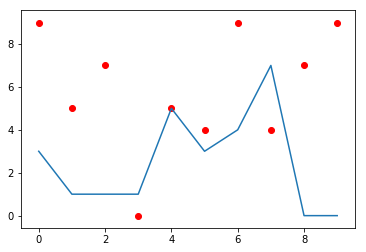

In [4]:
# Рисовании линии
plt.plot(xs, ys1)
# Рисовании точек
plt.scatter(xs, ys2,color='red')
plt.show()

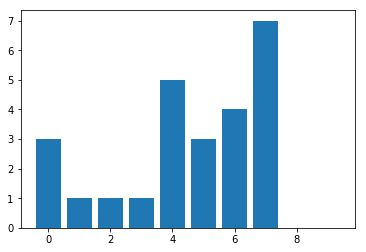

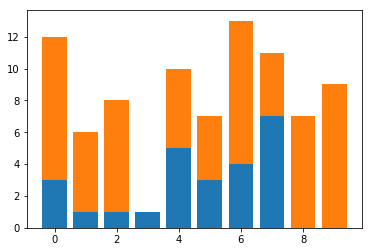

In [5]:
# Столбцы
plt.bar(xs, ys1)
plt.show()

plt.bar(xs, ys1)
plt.bar(xs, ys2, bottom=ys1)
plt.show()

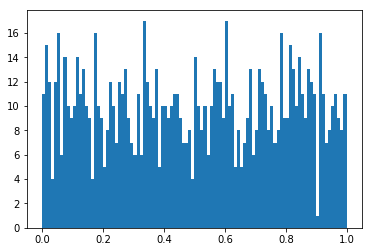

In [6]:
# Гистограмма
np.random.seed(18182)
vals = np.random.rand(1000)
plt.hist(vals, bins=100)
plt.show()

# Работа с графиками

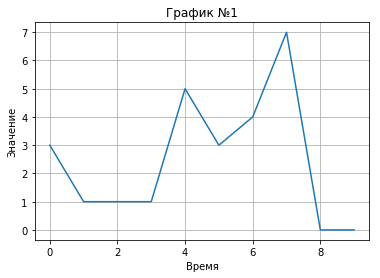

In [7]:
plt.plot(xs, ys1)
# Подписи осей
plt.xlabel('Время')
plt.ylabel('Значение')
# Заголовок
plt.title('График №1')
#  Добавление сетки координат
plt.grid()
plt.show()

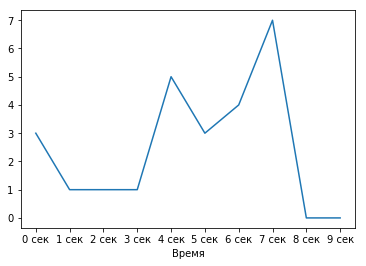

In [8]:
# Значения
xs_new = np.char.add(xs.astype(str), ' сек')

plt.plot(xs, ys1)
plt.xlabel('Время')
plt.xticks(xs, xs_new)
plt.show()

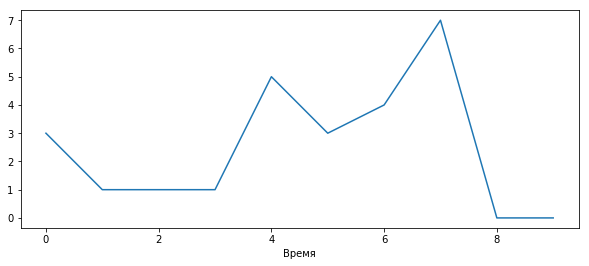

In [9]:
# Размеры графика
plt.figure(figsize=(10, 4))
plt.plot(xs, ys1)
plt.xlabel('Время')
plt.show()

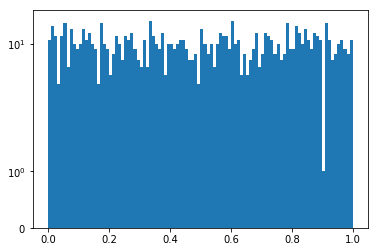

In [10]:
# Масштабирование
plt.hist(vals, bins=100)
plt.yscale('symlog')
plt.show()

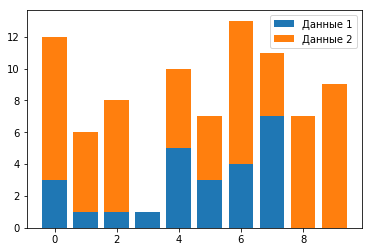

In [11]:
# Легенда
plt.bar(xs, ys1, label='Данные 1')
plt.bar(xs, ys2, bottom=ys1, label='Данные 2')
plt.legend()
plt.show()

# Объединение графиков

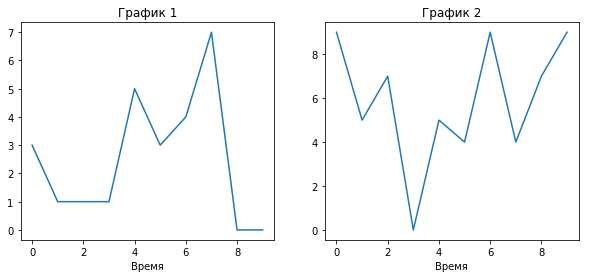

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(xs, ys1)
plt.xlabel('Время')
plt.title('График 1')

plt.subplot(1, 2, 2)
plt.plot(xs, ys2)
plt.xlabel('Время')
plt.title('График 2')

plt.show()

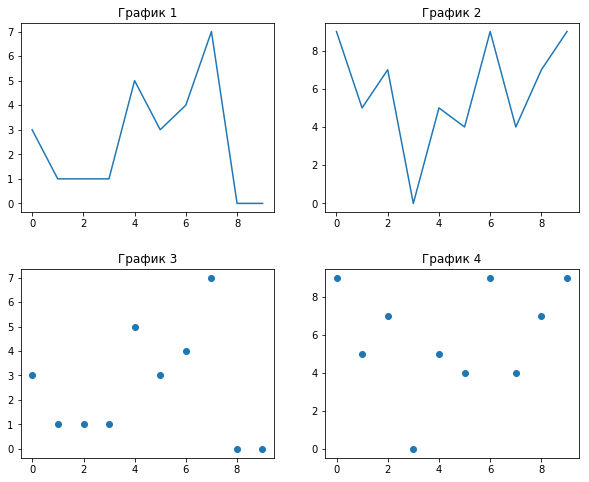

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(xs, ys1)
plt.title('График 1')

plt.subplot(2, 2, 2)
plt.plot(xs, ys2)
plt.title('График 2')

plt.subplot(2, 2, 3)
plt.scatter(xs, ys1)
plt.title('График 3')

plt.subplot(2, 2, 4)
plt.scatter(xs, ys2)
plt.title('График 4')

# Форматирование расположения графиков. Увеличение вертикального расстояния
plt.subplots_adjust(hspace=0.3)

plt.show()

# Визуализация в pandas

In [14]:
import pandas as pd
df = pd.read_csv('data/wells_info.csv')
df.head()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.8004
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414


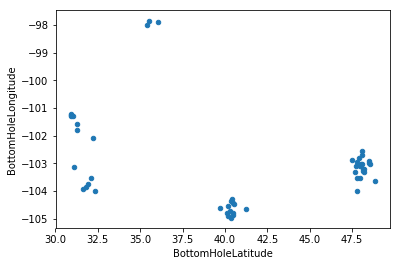

In [15]:
df.plot('BottomHoleLatitude', 'BottomHoleLongitude', kind='scatter')
plt.show()

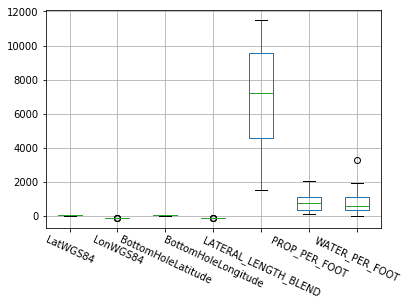

In [16]:
df.drop('API', axis=1).boxplot()
plt.xticks(rotation=-25)
plt.show()

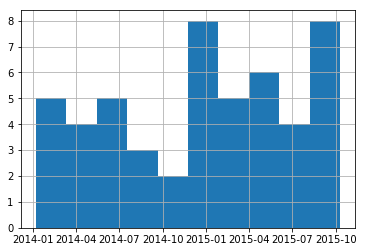

In [17]:
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'])
df['CompletionDate'].hist()
plt.show()

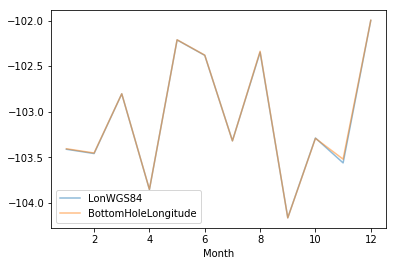

In [18]:
df['Month'] = df['CompletionDate'].dt.month
df.groupby('Month').mean()[['LonWGS84', 'BottomHoleLongitude']].plot(alpha=0.5)
plt.show()

### Отображение с группировкой

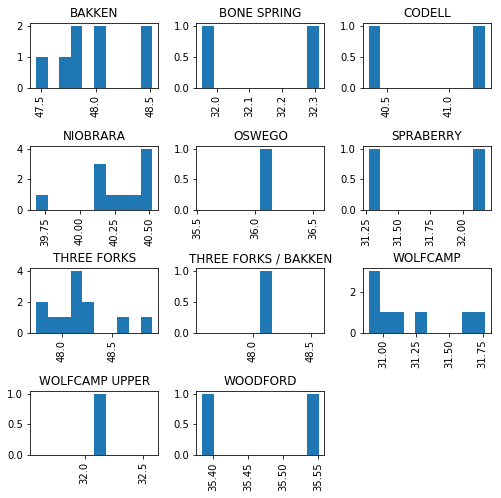

In [19]:
# Гистограмма по группам
df.hist('LatWGS84', by='formation', figsize=(8, 8))
plt.subplots_adjust(hspace=0.9)
plt.show()

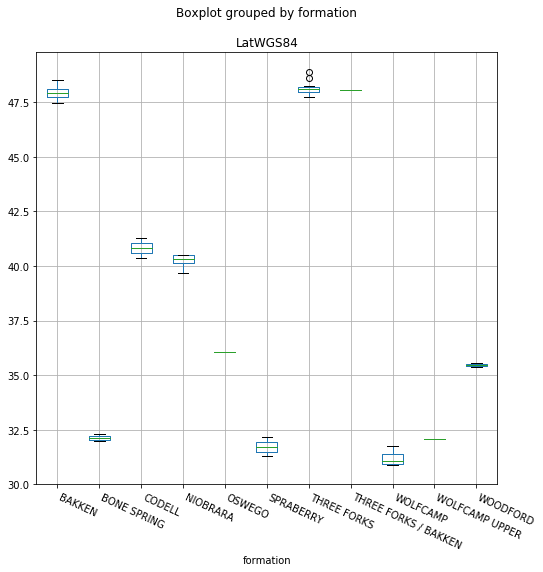

In [20]:
# Boxplot по группам
df.boxplot('LatWGS84', by='formation', figsize=(8, 8))
plt.subplots_adjust(hspace=0.9)
plt.xticks(rotation=-25, ha='left')
plt.show()

# seaborn

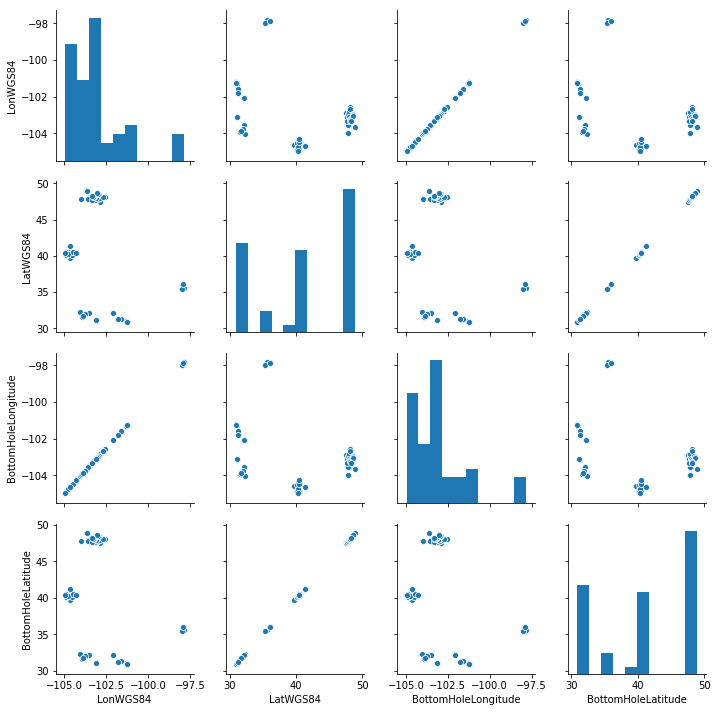

In [21]:
import seaborn as sns

cols = ['LonWGS84', 'LatWGS84', 'BottomHoleLongitude', 'BottomHoleLatitude']
sns.pairplot(df[cols])
plt.show()

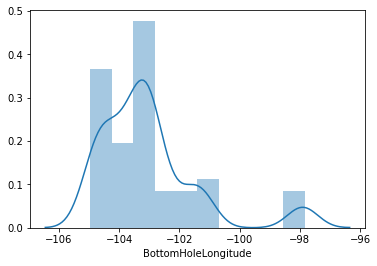

In [22]:
sns.distplot(df['BottomHoleLongitude'])
plt.show()

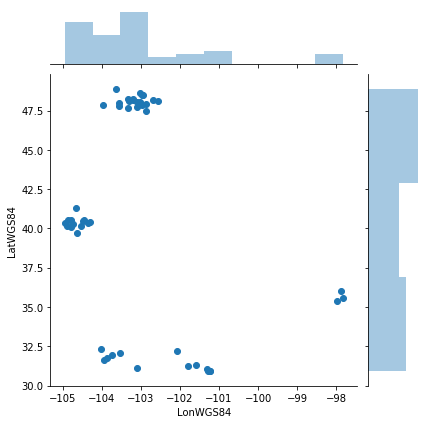

In [23]:
sns.jointplot(df['LonWGS84'], df['LatWGS84'])
plt.show()

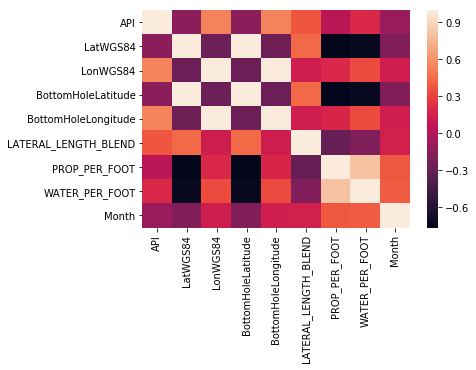

In [24]:
# Матрица корреляции
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

# Задания

1. Для случайных 10 скважин выведите столбцевые графики их добычи по времени. Добавить подписи осей, легенду, сетку координат.  
2. Выделите цветом те месяцы добычи, когда производство в сравнении с предыдущим месяцем увеличилось более чем на 10%.  
3. Добавьте линейный график скользящего среднего с окном 3 и 5 (можно использовать метод rolling у класса Series).
4. Исследовать зависимость добычи за первый год от числовых величин (pairplot, матрица корреляции) и от категориальных (boxplot по каждой величине на одном графике).  